<a href="https://www.kaggle.com/code/shubhammoudgil/customer-churn-using-ann-imbalanced-data-handling?scriptVersionId=110470449" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [2]:
filepath = '../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(filepath)
data.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4886,2673-ZALNP,Female,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.9,173.15,No
165,6345-FZOQH,Male,0,Yes,No,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.9,1363.45,No
6401,0807-ZABDG,Female,0,No,Yes,3,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.1,154.65,Yes


In [3]:
print(f'There are {data.shape[0]} number of columns and {data.shape[1]} number of rows in the given dataset')

There are 7043 number of columns and 21 number of rows in the given dataset


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are so many columns with Object values so we have to deal with them.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA CLEANING

In [6]:
#drop useless columns
data = data.drop('customerID', axis=1)

<AxesSubplot:>

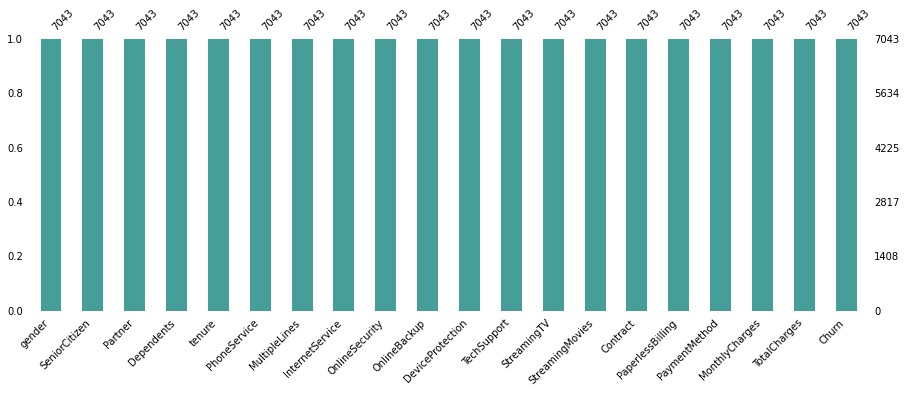

In [7]:
import missingno as msno
msno.bar(data,figsize=(15, 5),fontsize=10,color = '#459E97')

In [8]:
#TotalCharges column has an object datatype and is a numerical feature, so I will convert them to correct datatypes.
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) # This column have some values seems to be not numbers but blank strings ' '. Let's find out such rows. I noticed it when I tried converting it to float and it gave me an error that it could not convert string to float
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median()) # I will fill the missing values with median

SeniorCitizen column has an integer datatype and it is clearly a categorical variable

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)
data['SeniorCitizen'] = data['SeniorCitizen'].fillna(data['SeniorCitizen'].mode()[0])
data["SeniorCitizen"].replace({'nan': '0.0'},inplace=True)
data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Text(0.5, 1.0, 'tenure outlairs')

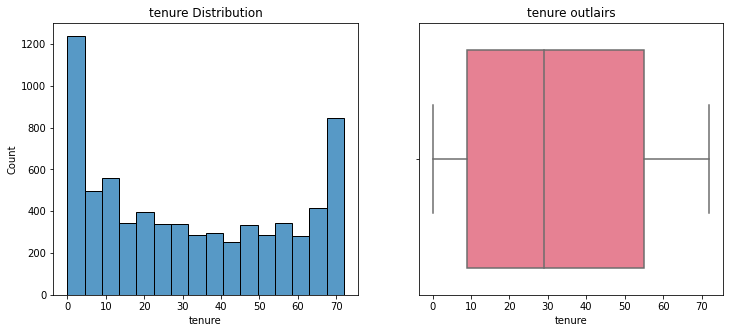

In [10]:
import seaborn as sns
#plt.figure(figsize=(10,5))
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=data, x='tenure', ax=ax[0],palette="husl")
ax[0].set_title('tenure Distribution')
sns.boxplot(data=data, x='tenure', ax=ax[1],palette="husl")
ax[1].set_title('tenure outlairs')

As we can see that distribution is not normally distributed and it is slightly skewed so its better to impute with median

There are several features in our dataset like Online Security which has both No and No internet sercvice as a value. As this both values are essentially the same thing, I will convert it to one

In [11]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 
                                                                'DeviceProtection', 'TechSupport', 
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [12]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Handling Outliars

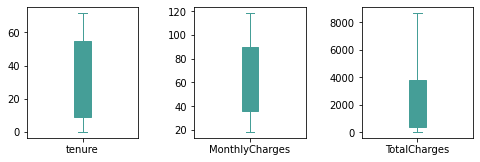

In [13]:
numeric_data=data.select_dtypes(exclude=["object"])
numeric_data.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (14,14),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)

There are no outliers but we can see the skewness in the distribution of the data 

In [14]:
numeric_data.columns[:24]

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

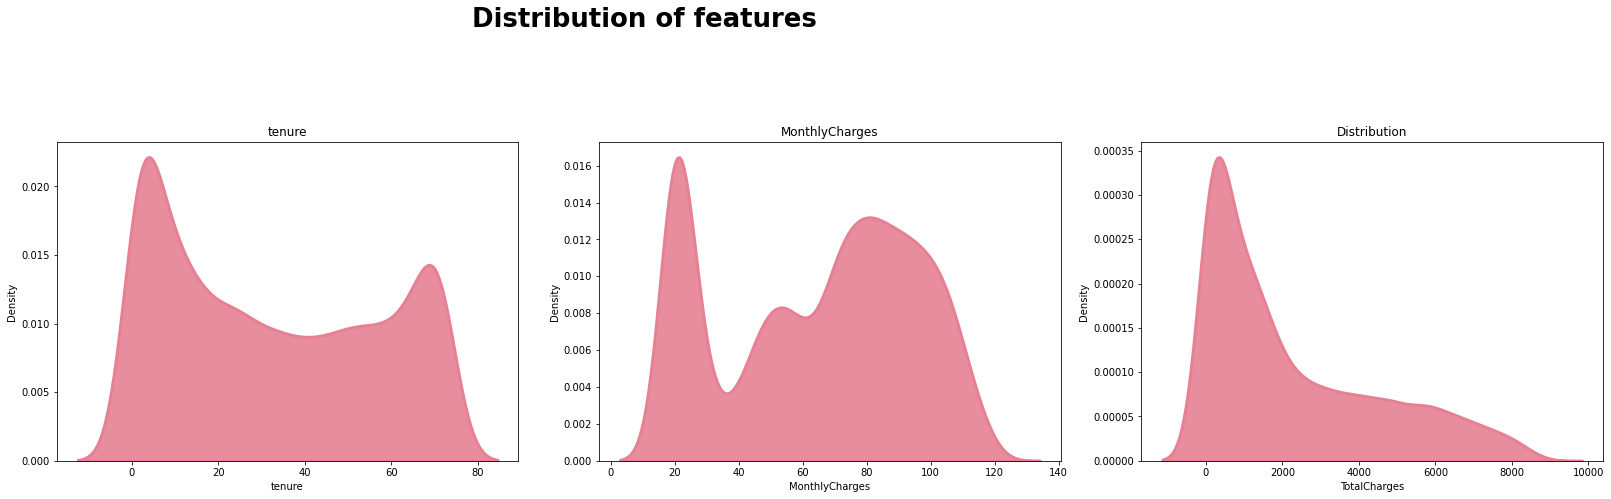

In [15]:
plt.figure(figsize = (30,30))
for ax, col in enumerate(numeric_data.columns):
    plt.subplot(6,4, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = numeric_data[col],fill=True, common_norm=False, color="#E68193",alpha=.9, linewidth=3);
    
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.05,x=0.3, size = 26, color = 'black', weight='bold');

here we can see more clear the distribution of the features we have

# EXPLORATORY DATA ANALYSIS

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Correlation of Features')

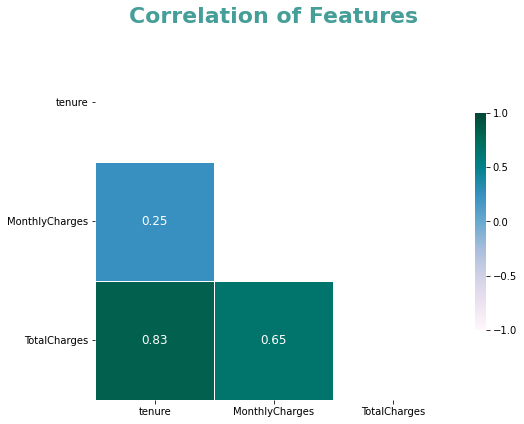

In [16]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(8, 10))

heatmap = sns.heatmap(data.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(data.corr(), rotation = 0)
ax.set_xticklabels(data.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
              arrowprops=dict(
                    facecolor="#459E97", shrink=0.025, 
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlation of Features', size = 22, color = "#459E97", weight='bold', pad=20)

**First of all, drop customerID column as it is of no use**

In [17]:
import plotly.express as px
px.scatter(x=data['MonthlyCharges'], y=data['TotalCharges'], color=data['Churn'], height=350, width=800)

As we can see that definitely there is a correlation between tenure and total charges

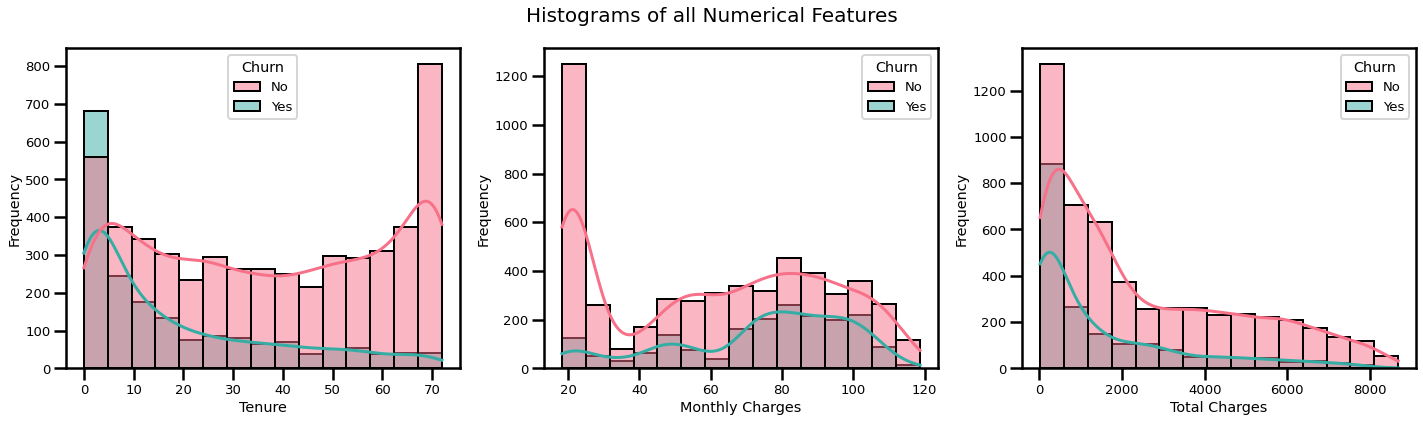

In [18]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = data['tenure'], hue= data['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'husl')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['MonthlyCharges'], hue= data['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'husl')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['TotalCharges'], hue= data['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'husl')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

We can see that:

if the client stayed from 0 to nearly 20 months only he is more likely to churn. if the monthly charges is between 60 to 120 dollars he is more likely to churn there is a little difference between the two density curves for the total charges. The more months the customer stays with the company, the less likely it is that he/she will churn. Also, the total charges column is clearly skewed, I will apply log transformation later.

After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



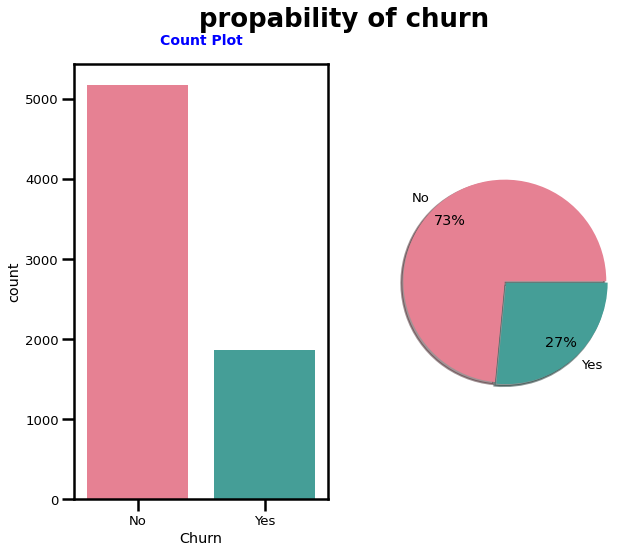

In [19]:
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle(' propability of churn ', size = 26, color = 'black', weight='bold')
axs = [ax1, ax2]

#Count-Plot
sns.countplot(data['Churn'], ax=ax1, palette='husl')
ax1.set_title('Count Plot', size = 14, color = 'blue', weight='bold', pad=20)



#Data-2
names = ["No", "Yes"]
values = data['Churn'].value_counts()
colors = ["#E68193","#459E97"]
explode = (0.01, 0.01)

#Doughnut-chart
ax2.pie(x= values,labels =names, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode,shadow= True);

We clearly have a imbalanced dataset. Out of all the customers, 73.46% of people won't churn. We will have to take that into account while splitting the dataset as we see that there is unbalanced data so we are gonna handle that with oversambling and undersambling data

The more months the customer stays with the company, the less likely it is that he/she will churn. Also, the total charges column is clearly skewed, I will apply log transformation later.

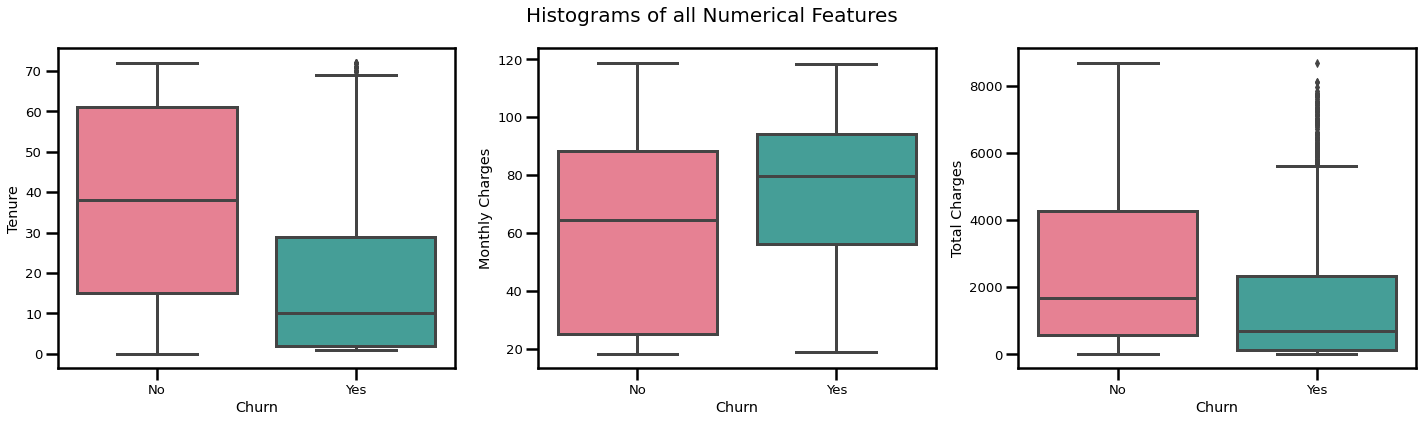

In [20]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'husl')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1],palette= 'husl')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'husl')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

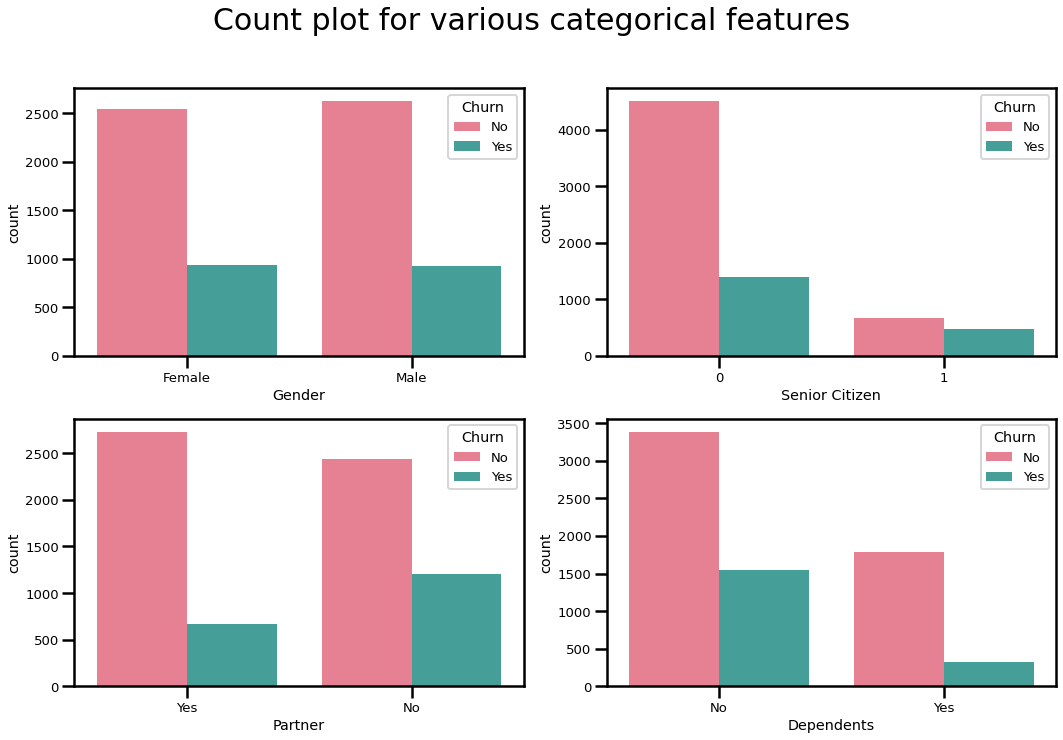

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30,y=1.03 )

ax1 = sns.countplot(x ='gender', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'husl')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'husl')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'husl')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'husl')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the demographic information, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

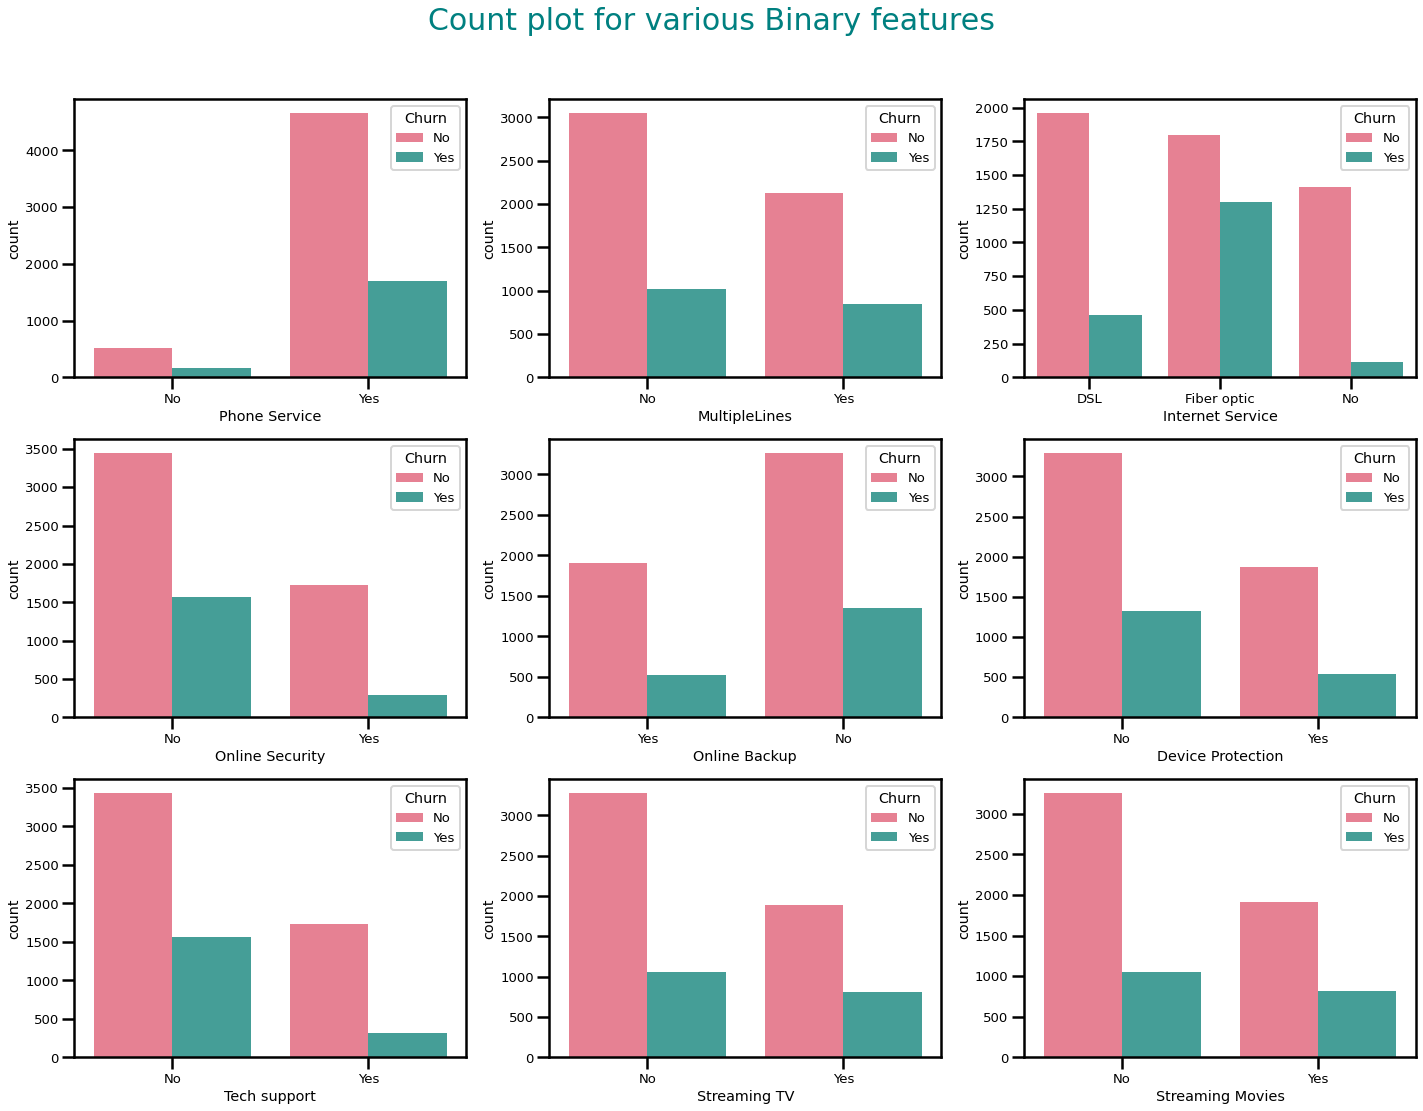

In [22]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various Binary features', fontsize = 30, color= 'teal',y=1.03)

ax1 = sns.countplot(x ='PhoneService', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'husl')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'husl')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= data, hue= 'Churn', ax= ax[0, 2], palette= 'husl')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'husl')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'husl')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= data, hue= 'Churn', ax= ax[1, 2], palette= 'husl')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= data, hue= 'Churn', ax= ax[2, 0], palette= 'husl')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= data, hue= 'Churn', ax= ax[2, 1], palette= 'husl')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= data, hue= 'Churn', ax= ax[2, 2], palette= 'husl')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()

as we can see that Customers having Fiber optic internet service are much more likely to churn then customers who don't

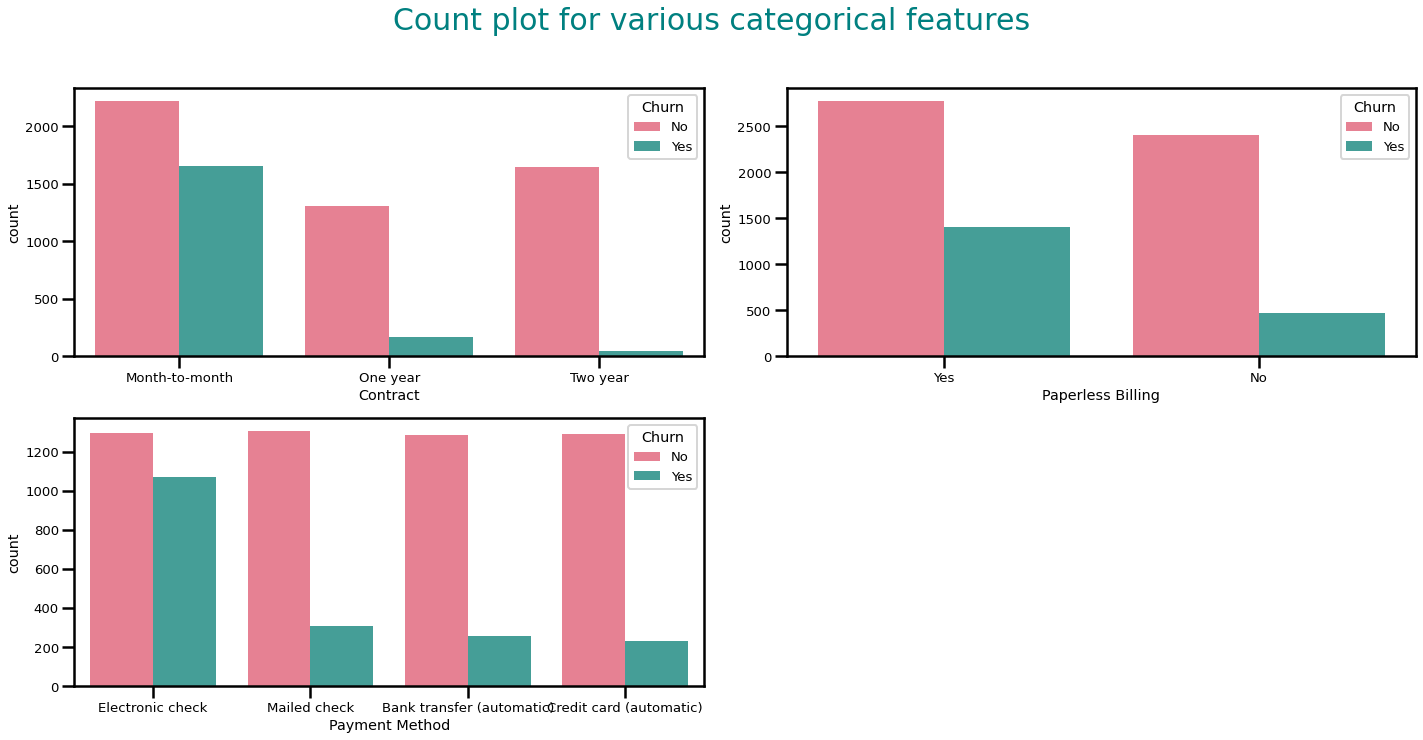

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal',y=1.03)

ax1 = sns.countplot(x ='Contract', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'husl')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'husl')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'husl')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

We can see that:

Churn rate is : Is high for Clients that has a month-to-month contract ( 16551655+2220=42.71% ). That is reasonable by the way as he could make the contract more than that if he intended to stay longer. Is high for Clients that has paperless billing ( 14001400+2768=33.59% ). Maybe there is a problem in the website or something. Is very high for Clients that pay by electronic check ( 10711071+1294=45.29% ). May be the GUI or the website is not good enough.

Based on the Account information, customers having longer contracts are much more less likely to churn. Also, customers who use Electronic Check as a payment method have higher chances of churning then customers who use other methods

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts

In [24]:
import plotly.express as px
px.histogram(data, x='tenure', facet_col='Contract', height=300)

In [25]:
px.histogram(data, x='tenure', facet_col='Dependents', facet_row='Partner', height=500)

# Feature Engineering

In [26]:
# Perform the skew transformation:
skew_cols=["tenure","MonthlyCharges","TotalCharges"]
for col in skew_cols:
        data[col] = data[col].apply(np.log1p)

# Model Creation

In [27]:
#split
from sklearn.model_selection import train_test_split

#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import OrdinalEncoder

#models
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

#Hyper-Parameter-Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

**Encoding**

In [28]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.693147,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,3.429137,3.429137,No
1,Male,0,No,No,3.555348,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,4.059581,7.544597,No
2,Male,0,No,No,1.098612,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,4.004602,4.692723,Yes


As we can see that there are some Yes No columns so let us rename these Yes No with 1 and 0

In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn',"SeniorCitizen"]
for col in yes_no_columns:
    data[col] = data[col].replace({'Yes': 1,'No': 0})
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,0.693147,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,3.429137,3.429137,0
1,Male,0,0,0,3.555348,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,4.059581,7.544597,0
2,Male,0,0,0,1.098612,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,4.004602,4.692723,1


In [30]:
#data.dtypes
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
#getting unique values from columns where values are unique
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
InternetService : ['DSL', 'Fiber optic', 'No']
Contract : ['Month-to-month', 'One year', 'Two year']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


In [31]:
data["SeniorCitizen"].replace({'0.0': 0,'1.0':1},inplace=True)
data['gender'].replace({'Female':1,'Male':0},inplace=True)

data = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
x = data.drop("Churn", axis = 1)
y = data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64


In [33]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

scale = MinMaxScaler()
col = x_train.columns

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

In [34]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds
    

In [35]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

2022-11-09 06:11:52.447097: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-09 06:11:52.629335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7472
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8016
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8074
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8044
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8097
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8097
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8126
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8129
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8111
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3970 - accura

As we can see the f1-score is very less for class 1 and this is due to highly imbalanced data. Let us try different approaches to cater this problem and see if F1-SCORE improves.

Method 1: Undersampling Majority Class

In [36]:
# Class count
count_class_0, count_class_1 = data.Churn.value_counts()

# Divide by class
df_class_0 = data[data['Churn'] == 0]
df_class_1 = data[data['Churn'] == 1]

In [37]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [38]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [39]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [40]:
y_test.dtypes

dtype('int64')

In [41]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6494 - accuracy: 0.6572
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7585
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7732
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7746
Epoch 11/

As we can see the improvement in F1-Score

Let us try other methods of handling imbalanced data. As in undersampling we end up in wasting data which could have been used.
Method 2 Oversampling

In [43]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5174
1    5174
Name: Churn, dtype: int64


In [44]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [45]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [46]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7354
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.7712
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.7691
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.7727
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7710
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.7729
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.7780
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7784
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7774
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4598 - accura

We can see that there is an improvement although it it not very significant change but still

Method 3: SMOTE

In [47]:
x = data.drop('Churn',axis='columns')
y = data['Churn']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [48]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [49]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [50]:
from sklearn.model_selection import train_test_split
X_sm = np.asarray(X_sm).astype(np.float32)
y_sm = np.asarray(y_sm).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7539
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7867
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7859
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.7898
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7917
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4543 - accuracy: 0.7899
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.7919
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4487 - accuracy: 0.7946
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7933
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4454 - accura

Here using SMOTE best results have been obtained.